In [74]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 


In [118]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [77]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

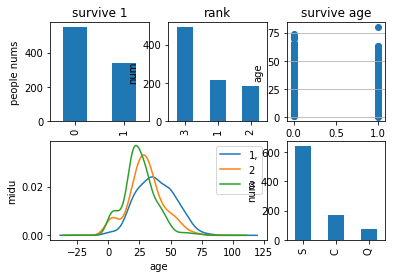

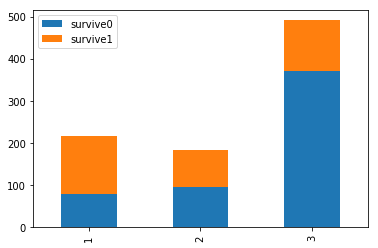

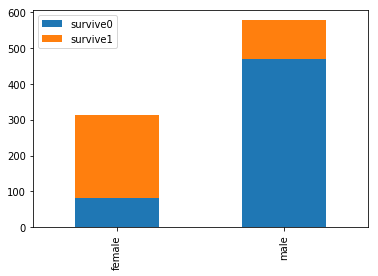

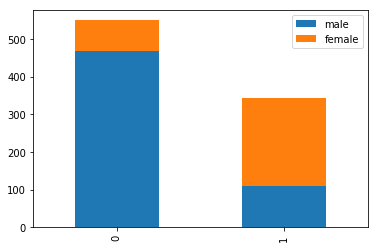

In [78]:
fig = plt.figure()
fig.set(alpha=0.2)
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar')
plt.title(u"survive 1")
plt.ylabel(u"people nums")

plt.subplot2grid((2,3),(0,1))
df.Pclass.value_counts().plot(kind='bar')
plt.title('rank')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,2))
plt.scatter(df.Survived,df.Age)
plt.title("survive age")
plt.ylabel("age")
plt.grid(b=True,which='major',axis='y')

plt.subplot2grid((2,3),(1,0),colspan=2)
df.Age[df.Pclass==1].plot(kind='kde')
df.Age[df.Pclass==2].plot(kind='kde')
df.Age[df.Pclass==3].plot(kind='kde')
plt.ylabel('midu')
plt.xlabel('age')
plt.legend(('1,','2','3'),loc='best')

plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar')
plt.ylabel("num")

survive0 = df.Pclass[df.Survived==0].value_counts()
survive1 = df.Pclass[df.Survived==1].value_counts()
dfs = pd.DataFrame({'survive0':survive0,'survive1':survive1})
dfs.plot(kind='bar',stacked=True)


sex0 = df.Sex[df.Survived==0].value_counts()
sex1 = df.Sex[df.Survived==1].value_counts()
dfs = pd.DataFrame({'survive0':sex0,'survive1':sex1})
dfs.plot(kind='bar',stacked=True)

male = df.Survived[df.Sex=='male'].value_counts()
female = df.Survived[df.Sex=='female'].value_counts()
dfs = pd.DataFrame({'male':male,'female':female})
dfs.plot(kind='bar',stacked=True)

plt.show()

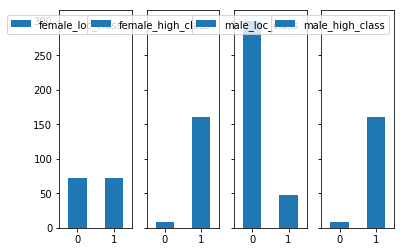

In [79]:
fig = plt.figure()
fig.set(alpha=0.5)

aix1=fig.add_subplot(141)
df.Survived[df.Sex=='female'][df.Pclass==3].value_counts().sort_index(ascending=True).plot(kind='bar',label='female,low class')
aix1.set_xticklabels(['0','1'],rotation=0)
plt.legend(['female_loc_class'],loc='best')

aix2=fig.add_subplot(142,sharey=aix1)
df.Survived[df.Sex=='female'][df.Pclass!=3].value_counts().sort_index(ascending=True).plot(kind='bar',label='female,high class')
aix2.set_xticklabels(['0','1'],rotation=0)
plt.legend(['female_high_class'],loc='best')


aix3=fig.add_subplot(143,sharey=aix2)
df.Survived[df.Sex=='male'][df.Pclass==3].value_counts().sort_index(ascending=True).plot(kind='bar',label='male,low class')
aix3.set_xticklabels(['0','1'],rotation=0)
plt.legend(['male_loc_class'],loc='best')

aix4=fig.add_subplot(144,sharey=aix3)
df.Survived[df.Sex=='female'][df.Pclass!=3].value_counts().sort_index(ascending=True).plot(kind='bar',label='male,high class')
aix4.set_xticklabels(['0','1'],rotation=0)
plt.legend(['male_high_class'],loc='best')


In [80]:
g = df.groupby(['SibSp','Survived'])
g = g.count()['PassengerId']
g

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

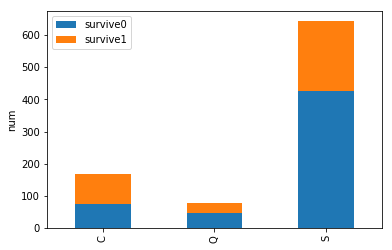

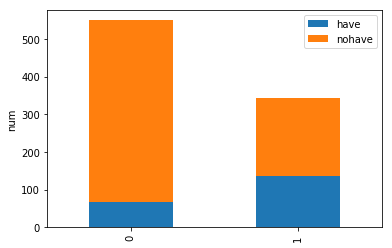

In [81]:
#港口
survive0 = df.Embarked[df.Survived==0].value_counts().sort_index()
survive1 = df.Embarked[df.Survived==1].value_counts().sort_index()
gdf = pd.DataFrame({'survive0':survive0,'survive1':survive1})
gdf.plot(kind='bar',stacked=True)
plt.legend(['survive0','survive1'],loc='best')
plt.ylabel('num')

#船舱
have = df.Survived[pd.notnull(df.Cabin)].value_counts().sort_index()
nohave = df.Survived[pd.isnull(df.Cabin)].value_counts().sort_index()

cdf = pd.DataFrame({'have':have,'nohive':nohave})
cdf.plot(kind='bar',stacked=True)
plt.ylabel("num")
plt.legend(['have','nohave'],loc='best')


In [119]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(dataset):
    
    df = dataset[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    train_data = df[df.Age.notnull()].as_matrix()
    test_data = df[df.Age.isnull()].as_matrix()
    
    x_train = train_data[:,1:]
    y_train = train_data[:,0]
    
    x_test = test_data[:,1:]
    
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    predy = rfr.predict(x_test)
    dataset.loc[dataset.Age.isnull(),'Age'] = predy
    return dataset,rfr

def test_cabin(dataset):
    dataset.loc[(dataset.Cabin.notnull()),'Cabin']='yes'
    dataset.loc[(dataset.Cabin.isnull()),'Cabin']='no'
    return dataset

# set_missing_ages(df)
# test_cabin(df)

In [120]:
#字符编码
df,rfr = set_missing_ages(df)
df = test_cabin(df)
df.head()


D:\conda\parse\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\conda\parse\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
D:\conda\parse\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no,S


In [121]:
df.Cabin.value_counts()
# df.Age.value_counts()

no     687
yes    204
Name: Cabin, dtype: int64

In [122]:
data = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
def str2indx(dataset,col1,col2):
    collist = dataset[col1].unique().tolist()
    dataset[col2] = dataset[col1].apply(lambda x:collist.index(x))
    dataset.drop([col1],axis=1,inplace=True)
    return dataset

data = str2indx(data,'Sex','Sex_index')
data = str2indx(data,'Fare','Fare_index')
data = str2indx(data,'Cabin','Cabin_index')
data = str2indx(data,'Embarked','Embarked_index').as_matrix()

D:\conda\parse\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\conda\parse\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\conda\parse\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [123]:
y_train = data[:,0]
x_train = data[:,1:]

In [124]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
test = pd.read_csv("./test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [127]:
test = test_cabin(test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,no,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,no,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,no,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,no,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,no,S


In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [134]:
test.loc[(test.Fare.isnull()),'Fare'] = test.Fare.mean()

In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [140]:
t_d = test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
t_d = t_d[t_d.Age.isnull()][['Fare', 'Parch', 'SibSp', 'Pclass']]
len(t_d)

86

In [142]:
predt = rfr.predict(t_d)
predt

array([27.41620852, 55.53333333, 26.23333333,  9.3       , 29.3249417 ,
       30.08333333, 47.61335881, 35.44076371, 38.75      , 26.75      ,
       36.25079365, 29.3249417 , 27.41620852, 34.12271652, 21.39904762,
       35.44076371, 26.79339589, 29.3249417 , 35.44076371, 35.44076371,
       27.23171717, 26.79339589, 36.3       , 32.38691756, 35.44076371,
       25.33333333, 36.9       , 28.1       , 51.9       , 47.61335881,
       27.41620852, 19.8       , 39.05      , 41.74      , 35.35      ,
       22.28294553, 35.44076371, 10.87428571, 58.14166667, 25.61133467,
       25.225     , 46.30833333, 27.4709127 , 22.7       , 29.3249417 ,
       21.7       , 35.44076371, 22.7       , 25.97460317,  9.3       ,
       21.39904762, 35.35      , 35.44076371, 27.41620852, 38.83      ,
       35.35      , 29.3249417 , 35.44076371, 32.33333333, 32.17486111,
       35.44076371, 32.4764924 , 22.28294553, 29.3249417 , 44.2       ,
       22.28294553, 26.23333333, 27.95      , 35.44076371, 35.35

In [143]:
test.loc[test.Age.isnull(),"Age"]=predt
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [145]:
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
test = str2indx(test,'Sex','Sex_index')
test = str2indx(test,'Fare','Fare_index')
test = str2indx(test,'Cabin','Cabin_index')
test = str2indx(test,'Embarked','Embarked_index').as_matrix()

D:\conda\parse\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\conda\parse\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\conda\parse\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [147]:
predt=dtc.predict(test)

In [148]:
y_lable = pd.read_csv("./gender_submission.csv")
y_lable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [152]:
y_test = y_lable[['Survived']].values

In [156]:
np.sum(y_test.reshape(-1)==predt)/len(predt)

0.7679425837320574

In [157]:
from sklearn.tree import export_graphviz
export_graphviz(
              dtc, 
              out_file = "./tree.dot", 
              feature_names=['Pclass','Age','SibSp','Parch','Sex_index','Fare_index','Cabin_index','Embarked_index'],
              filled = True, 
              impurity = False,
              rounded = True
          )

In [ ]:
dot -Tpng tree.dot -o wineTree.png

!(png)[./wineTree.png]

In [72]:
du_sex = pd.get_dummies(df.Sex,prefix='sex')
du_cabin = pd.get_dummies(df.Cabin,prefix='cabin')
du_embarked = pd.get_dummies(df.Embarked,prefix='embarked')
du_ticket = pd.get_dummies(df.Ticket,prefix='ticket')
du_pclass = pd.get_dummies(df.Pclass,prefix='pclass')
df = pd.concat([df,du_sex,du_cabin,du_embarked,du_pclass],axis=1)
df.drop(['Sex','Cabin','Embarked','Ticket','Pclass','PassengerId','Name'],axis=1,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Sex'

In [73]:
df.head()

,Survived,Age,SibSp,Parch,Fare,sex_female,sex_male,cabin_yes,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,1,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,0,1,0,0,1


In [4]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

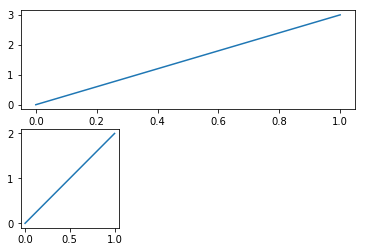

In [10]:
plt.subplot(2,1,1)
plt.plot([0,1],[0,3])
plt.subplot(2,3,4)
plt.plot([0,1],[0,2])


IndexError: invalid index

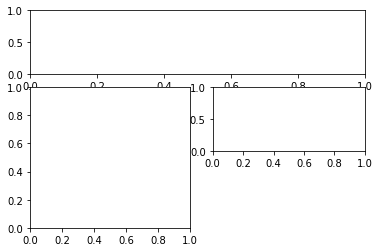

In [31]:
plt.subplot2grid((3,2),(0,0),colspan=4)
plt.subplot2grid((3,4),(1,0),colspan=2,rowspan=2)
plt.subplot2grid((3,2),(1,1))
plt.subplot2grid((2,4),(2,1))
plt.show()